# EXERCICE 1
1. Convertissez une image couleur en niveaux de gris, puis appliquez une technique 
d’égalisation d’histogramme pour améliorer le contraste de l’image en niveaux de gris. Affichez 
l’image et son histogramme avant et après l’égalisation.  
2. Appliquez la méthode CLAHE (Contrast Limited Adaptive Histogram Equalization) à la 
même image en niveaux de gris. Affichez l’image et son histogramme avant et après 
l’application de la méthode CLAHE. 

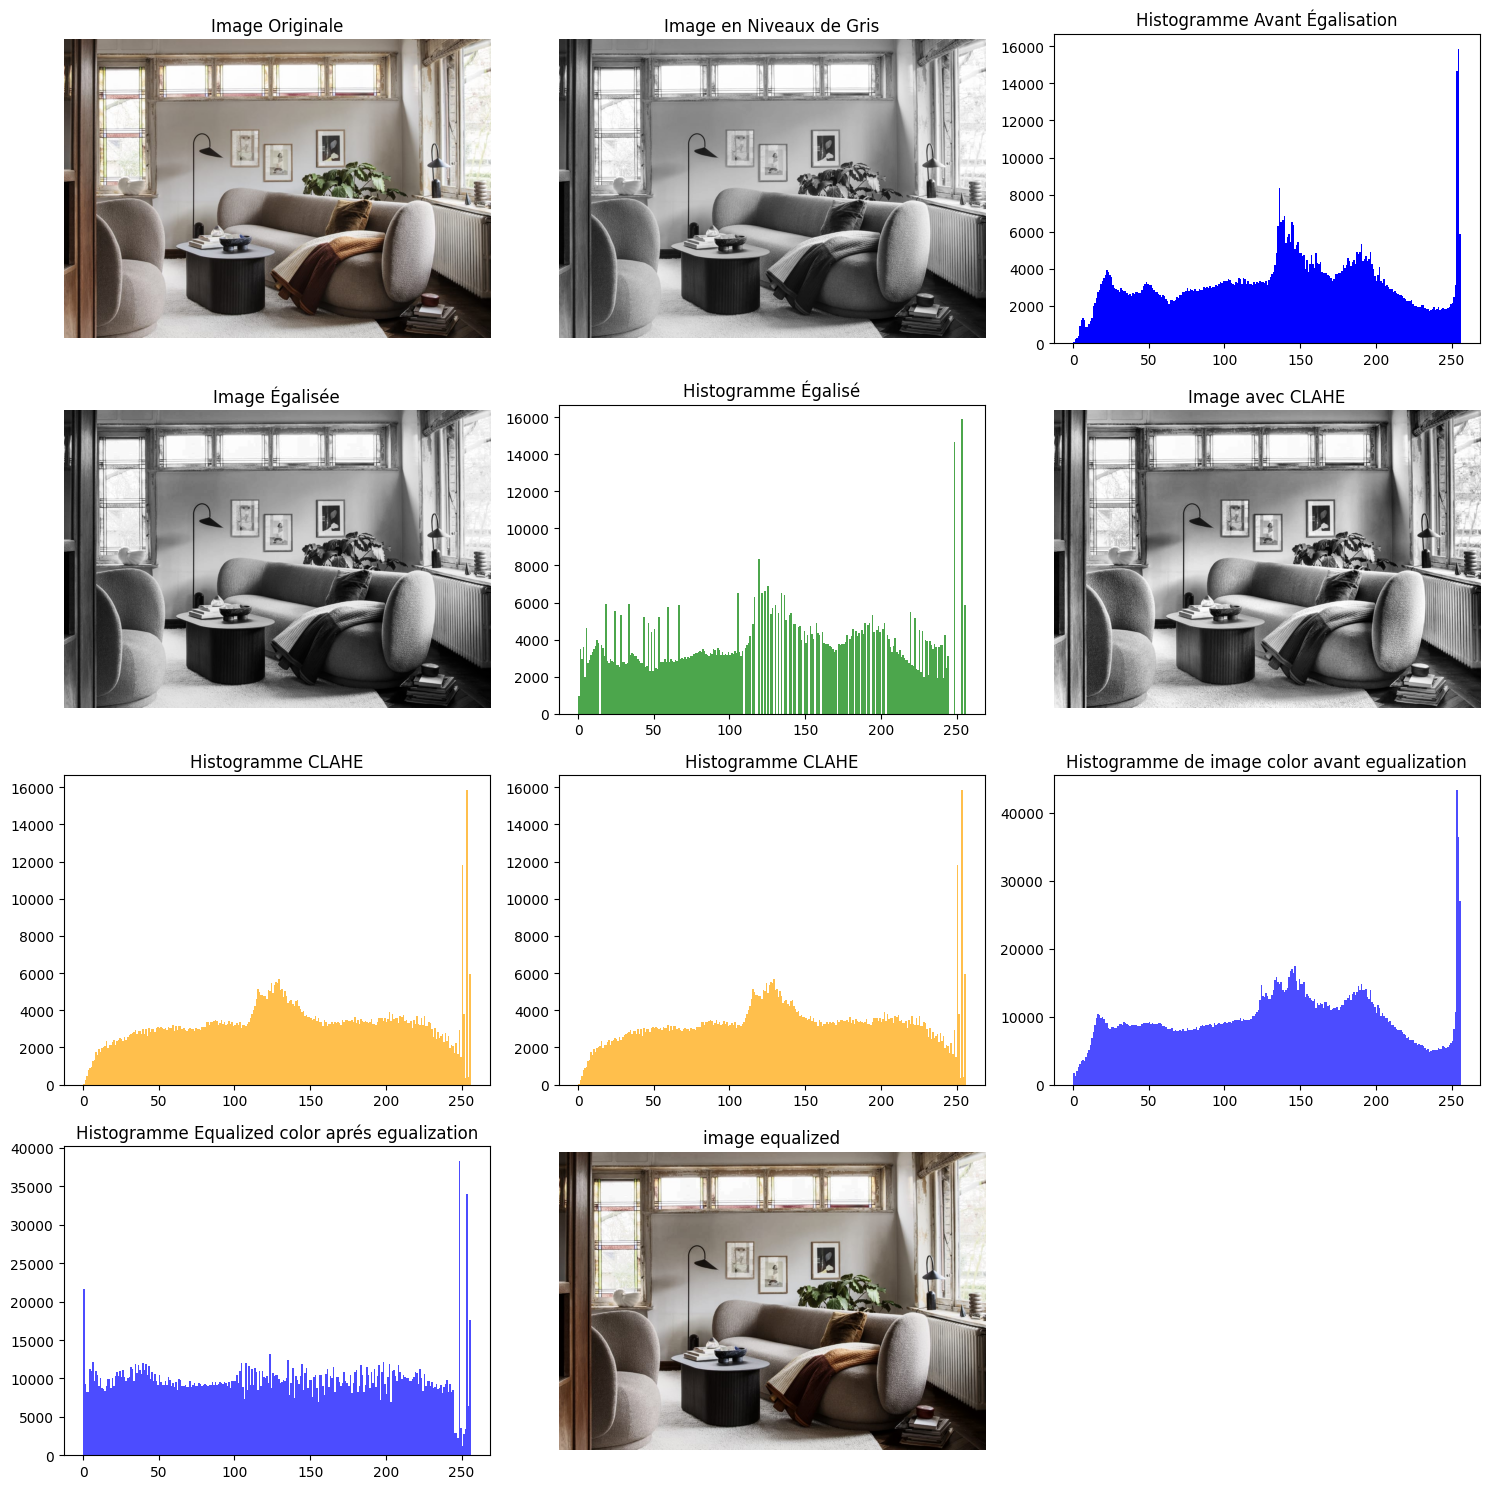

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image couleur
image = cv2.imread('images/image_color.jpg')

# Conversion en niveaux de gris
image_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Égalisation d'histogramme
equalized_image = cv2.equalizeHist(image_gris)

# 2. Application de CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image_gris)


# equalization of colored image

image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

y, cr, cb = cv2.split(image_ycrcb)

y_equalized = cv2.equalizeHist(y)

imageEQUALIZED = cv2.merge((y_equalized, cr, cb))

imageEQUALIZED = cv2.cvtColor(imageEQUALIZED, cv2.COLOR_YCrCb2RGB)

# --------



# Affichage des résultats
plt.figure(figsize=(15, 15))

# Image originale
plt.subplot(4, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Image Originale")

# Image en niveaux de gris
plt.subplot(4, 3, 2)
plt.imshow(image_gris, cmap='gray')
plt.axis('off')
plt.title("Image en Niveaux de Gris")

# Histogramme avant égalisation
plt.subplot(4, 3, 3)
plt.hist(image_gris.ravel(), 256, range=(0, 256), color='blue')
plt.title("Histogramme Avant Égalisation")

# Image après égalisation
plt.subplot(4, 3, 4)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title("Image Égalisée")

# Histogramme après égalisation
plt.subplot(4, 3, 5)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title("Histogramme Égalisé")

# Image après CLAHE
plt.subplot(4, 3, 6)
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')
plt.title("Image avec CLAHE")

# Histogramme après CLAHE
plt.subplot(4, 3, 7)
plt.hist(clahe_image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)
plt.title("Histogramme CLAHE")

plt.subplot(4, 3, 8)
plt.hist(clahe_image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)
plt.title("Histogramme CLAHE")

plt.subplot(4, 3, 9)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogramme de image color avant egualization")

plt.subplot(4, 3, 10)
plt.hist(imageEQUALIZED.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogramme Equalized color aprés egualization")

plt.subplot(4, 3, 11)
plt.imshow(imageEQUALIZED , cmap='gray')
plt.title("image equalized")
plt.axis('off')

plt.tight_layout()
plt.show()


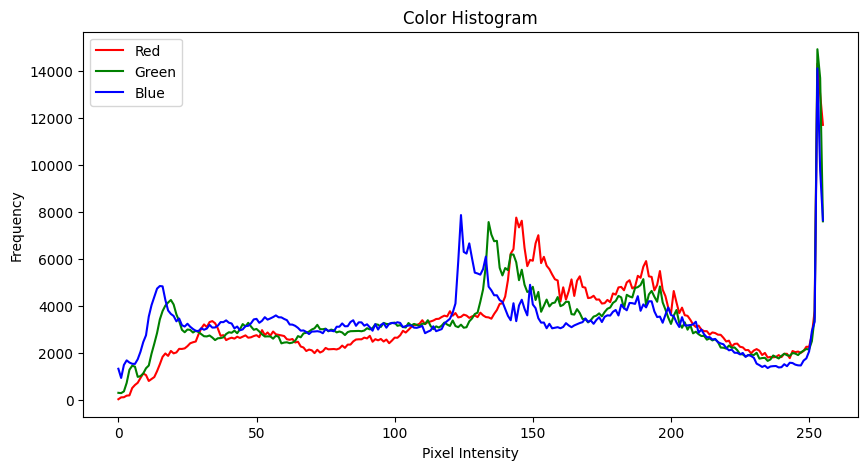

In [2]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the channels
channels = ('Red', 'Green', 'Blue')
colors = ('r', 'g', 'b')

# Plot the histogram for each channel
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])  # Compute histogram
    plt.plot(hist, color=color, label=channel)

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# EXERCICE 2:
1. Charger une image. 
2. Appliquer une transformation pour faire une rotation de l'image de 45 degrés et la 
redimensionner. 
3. Afficher l'image transformée.

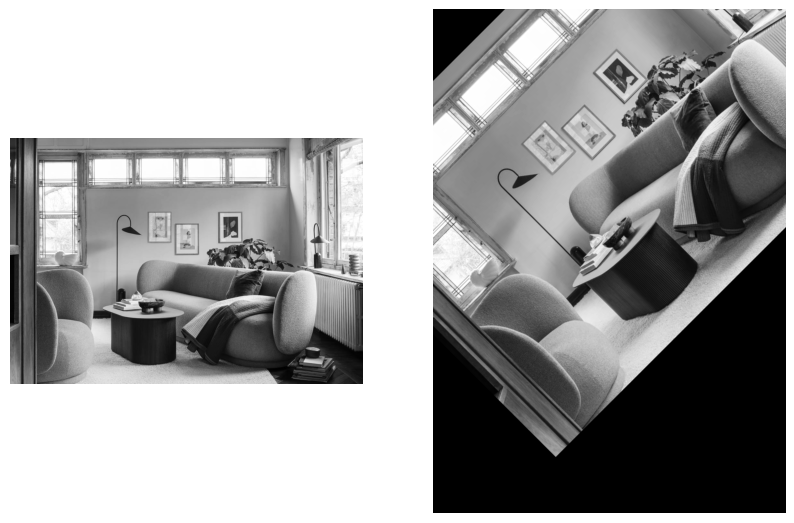

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('images/image_color.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

h, w = image.shape[:2]
center = (h // 2, w // 2)

rotation_matrix = cv2.getRotationMatrix2D(center, angle=45, scale = 1.0)

rotated_image = cv2.warpAffine(image_gray, rotation_matrix, (h, w))

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.show()

## EXERCICE 3:


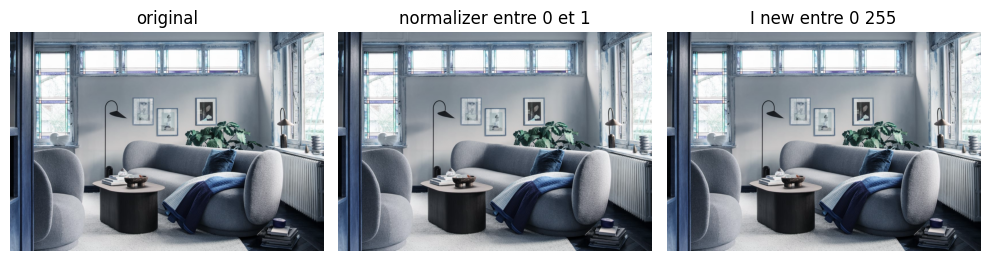

In [44]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/image_color.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, axs = plt.subplots(1,3, figsize=(10, 5))

i_max = np.max(image)
i_min = np.min(image)

L, C = image.shape[:2]

I_norm = (image - i_min) / (i_max - i_min)

I_new = (I_norm * 255).astype(np.uint8)
imgs = [image, I_norm,I_new]
titles = ['original', 'normalizer entre 0 et 1', 'I new entre 0 255']
for i in range(len(imgs)):
    axs[i].imshow(imgs[i], cmap='gray') 
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

#### utilisant la fonction prédifinie de python

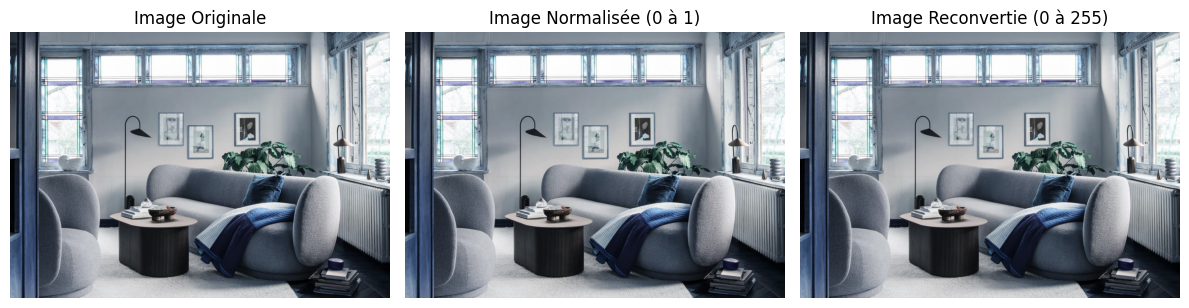

In [45]:

# 2. Normaliser les pixels de l'image entre 0 et 1 avec OpenCV et NumPy
I_norm = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# 3. Reconvertir l'image normalisée dans la plage [0, 255]
I_new = cv2.normalize(I_norm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# 4. Afficher les résultats
plt.figure(figsize=(12, 6))

# Image originale
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Image Originale")
plt.axis('off')

# Image normalisée (0 à 1)
plt.subplot(1, 3, 2)
plt.imshow(I_norm, cmap='gray')
plt.title("Image Normalisée (0 à 1)")
plt.axis('off')

# Image reconvertie (0 à 255)
plt.subplot(1, 3, 3)
plt.imshow(I_new, cmap='gray')
plt.title("Image Reconvertie (0 à 255)")
plt.axis('off')

plt.tight_layout()
plt.show()


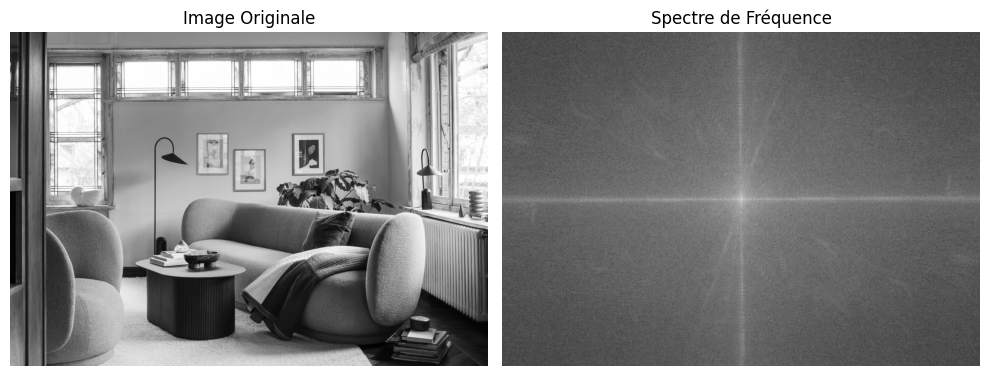

In [48]:
image = cv2.imread('images/image_color.jpg', cv2.IMREAD_GRAYSCALE)

f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

plt.figure(figsize=(10, 5))

# Image originale
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Image Originale")
plt.axis('off')

# Spectre de fréquence
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Spectre de Fréquence")
plt.axis('off')

plt.tight_layout()
plt.show()

## EXERCICE 5:

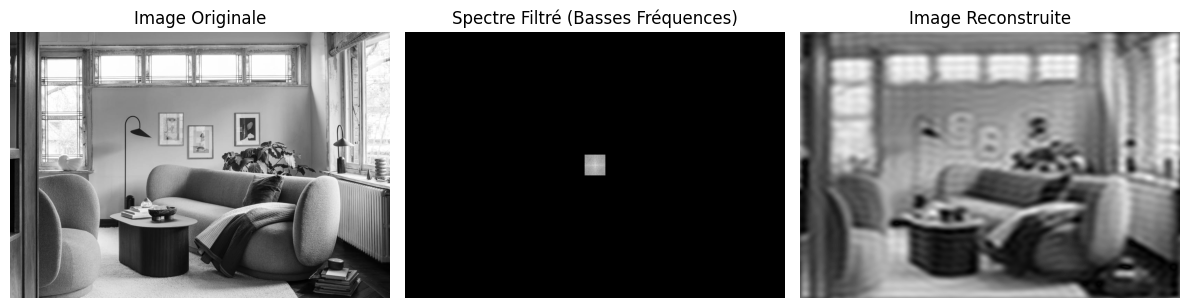

In [49]:
# 1. Charger l'image en niveaux de gris
# image = cv2.imread('TransFourier.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Appliquer la Transformée de Fourier
f_transform = np.fft.fft2(image)  # Transformée de Fourier 2D
f_shift = np.fft.fftshift(f_transform)  # Centrer les basses fréquences

# 3. Créer un masque pour conserver seulement les basses fréquences
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # Centre de l'image

# Taille du filtre
taille_filtre = 30  # Ajuster cette valeur pour garder plus ou moins de fréquences

# Créer un masque de zéros puis activer une région centrale (basses fréquences)
masque = np.zeros((rows, cols), np.uint8)
masque[crow - taille_filtre:crow + taille_filtre, ccol - taille_filtre:ccol + taille_filtre] = 1

# Appliquer le masque sur le spectre de Fourier
f_shift_filtre = f_shift * masque

# 4. Revenir dans le domaine spatial (Transformée Inverse de Fourier)
f_ishift = np.fft.ifftshift(f_shift_filtre)  # Déplacer les basses fréquences au coin
image_reconstruite = np.fft.ifft2(f_ishift)  # Transformée Inverse de Fourier
image_reconstruite = np.abs(image_reconstruite)  # Module des valeurs complexes

# 5. Afficher les résultats
plt.figure(figsize=(12, 6))

# Image originale
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Image Originale")
plt.axis('off')

# Spectre filtré
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(f_shift_filtre)), cmap='gray')
plt.title("Spectre Filtré (Basses Fréquences)")
plt.axis('off')

# Image reconstruite
plt.subplot(1, 3, 3)
plt.imshow(image_reconstruite, cmap='gray')
plt.title("Image Reconstruite")
plt.axis('off')

plt.tight_layout()
plt.show()
